In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
names = ['PPO', 'OSPOE', 'ENIAC', 'RND', 'PCPG']
table = {}
for name in names:
    mean = None
    for run in range(3):
        filename = f'./MountainCarFinal_eval_env32/{name}-seed{run}_mean.npy'
        if mean is None:
            mean = np.load(filename)
        else:
            mean += np.load(filename)
    mean /= 10
    table[name] = mean

In [50]:
names = ['PPO', 'OSPOE', 'ENIAC', 'RND', 'PCPG']
table_std = {}
for name in names:
    std = None
    for run in range(3):
        filename = f'./MountainCarFinal_eval_env32/{name}-seed{run}_std.npy'
        if std is None:
            std = np.load(filename)
        else:
            # print(np.load(filename))
            std += np.load(filename)
    std /= 3
    table_std[name] = std

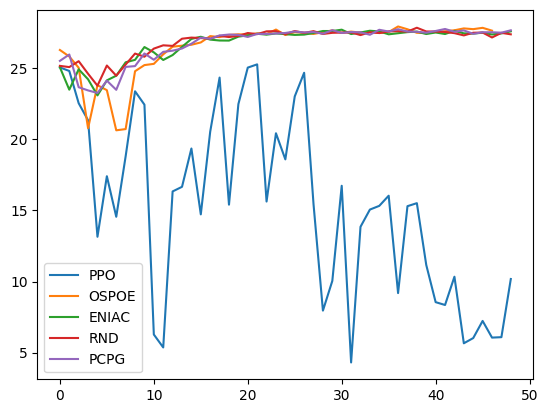

In [51]:
plt.figure()
for k in table.keys():
    plt.plot(table[k][5:], label=k)

plt.legend()

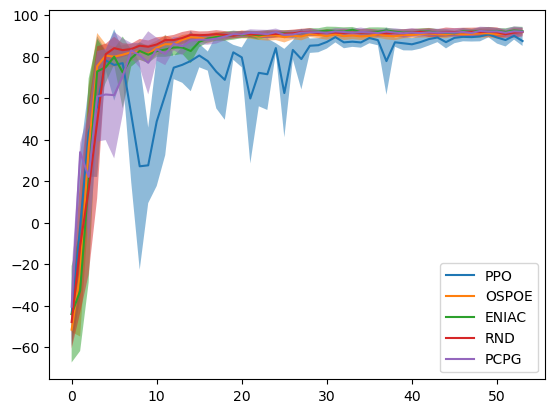

In [35]:
plt.figure()
for k in table.keys():
    
    plt.plot(table[k], label=k)
    plt.fill_between(range(len(table[k])), table[k] - table_std[k], table[k] + table_std[k], alpha=0.5)

plt.legend()

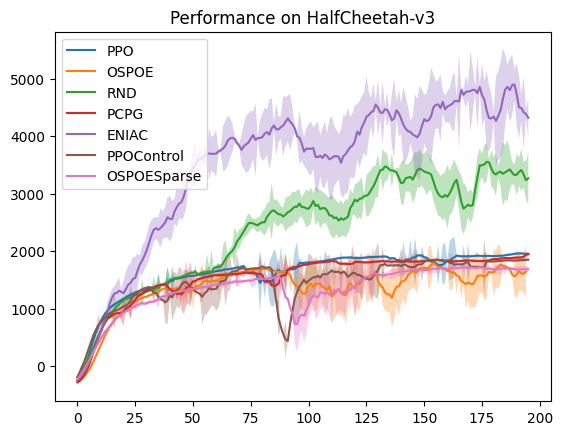

In [78]:
from numpy import convolve
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'PPOControl', 'OSPOESparse']
# names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'PPOControl']
# names = ['PPO']
table = {}
table_std = {}
env = 'halfcheetah'
for name in names:
    for run in range(2):
        filename = f'./Mujoco_eval_{env}/{name}-seed{run}_mean.npy'
        table[name] = np.load(filename)
        filename_std = f'./Mujoco_eval_{env}/{name}-seed{run}_std.npy'
        table_std[name] = np.load(filename_std) / 2
        
plt.figure()
plt.title('Performance on HalfCheetah-v3')
l = 7
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)
    
plt.legend()

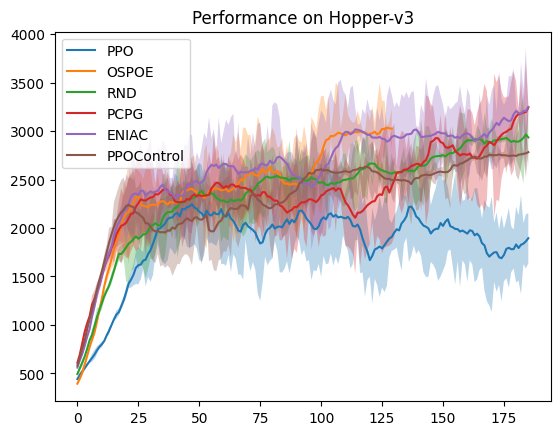

In [380]:
from numpy import convolve
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'PPOControl']
# names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC']
# names = ['PPO']
table = {}
table_std = {}
env = 'hopper'
for name in names: 
    for run in range(4):
        filename = f'./Mujoco_eval_{env}/{name}-seed{run}_mean.npy'
        table[name] = np.load(filename)
        filename_std = f'./Mujoco_eval_{env}/{name}-seed{run}_std.npy'
        table_std[name] = np.load(filename_std) / 2
        
plt.figure()
plt.title('Performance on Hopper-v3')
l = 17
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)
    
plt.legend()

In [377]:
len(table['OSPOE'])

5

In [429]:
2e6 / 4096

488.28125

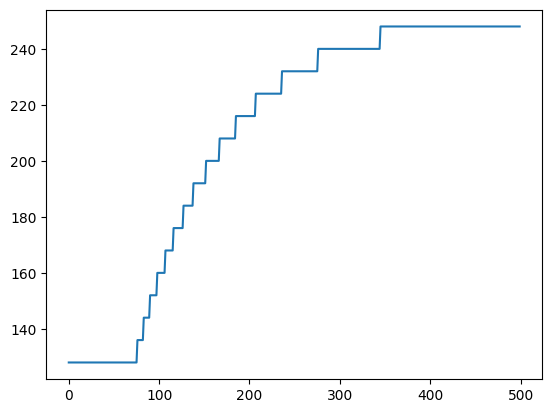

In [449]:
batch_size = 64
max_n_steps = 256
min_n_steps = 128
res = []

for i in range(500):
    ratio = 1 - 0.99 ** i
    steps = max(int(ratio * 256), min_n_steps)
    steps = steps // 8 * 8

    res.append(int(steps))
    
plt.plot(res)

In [452]:
res.index(136)

76

In [443]:
38 * 2048

77824

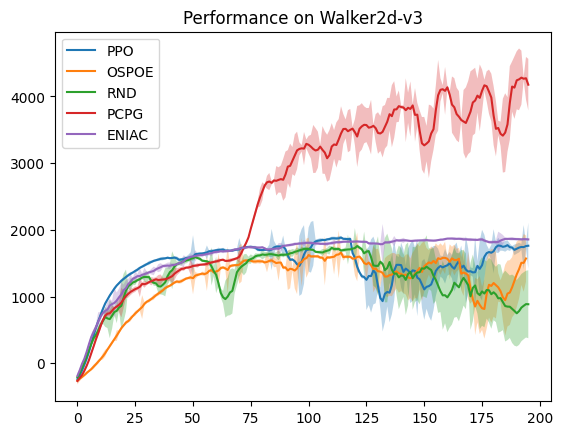

In [115]:
from numpy import convolve
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC']
# names = ['OSPOE', 'PPO']
# names = ['PPO']
table = {}
table_std = {}
env = 'halfcheetah'
for name in names:
    for run in range(5):
        filename = f'./Mujoco_eval_{env}/{name}-seed{run}_mean.npy'
        table[name] = np.load(filename)
        filename_std = f'./Mujoco_eval_{env}/{name}-seed{run}_std.npy'
        table_std[name] = np.load(filename_std) / 2
        
plt.figure()
plt.title('Performance on Walker2d-v3')
l = 7
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()

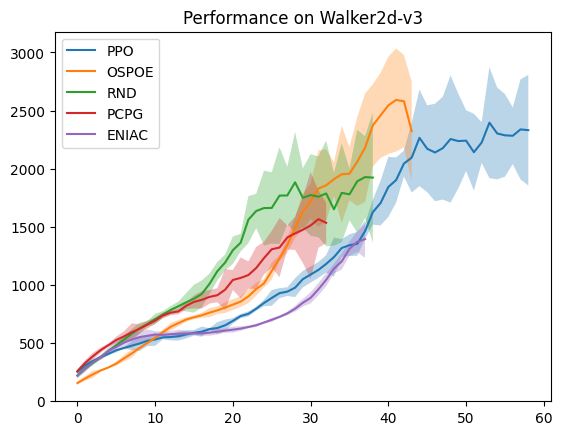

In [377]:
from numpy import convolve
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC']
# names = ['OSPOE', 'PPO']
# names = ['PPO']
table = {}
table_std = {}
env = 'hopper'
for name in names:
    for run in range(1):
        filename = f'./Mujoco_eval_{env}/{name}-seed{run}_mean.npy'
        table[name] = np.load(filename)
        filename_std = f'./Mujoco_eval_{env}/{name}-seed{run}_std.npy'
        table_std[name] = np.load(filename_std) / 2
        
plt.figure()
plt.title('Performance on Walker2d-v3')
l = 7
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()

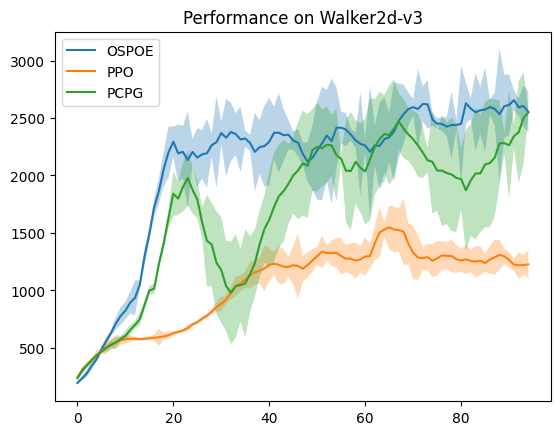

In [94]:
from numpy import convolve
# names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC']
names = ['OSPOE', 'PPO', 'PCPG']
table = {}
table_std = {}
for name in names:
    for run in range(5):
        filename = f'./Mujoco_eval_hopper_bk/{name}-seed{run}_mean.npy'
        table[name] = np.load(filename)
        filename_std = f'./Mujoco_eval_hopper_bk/{name}-seed{run}_std.npy'
        table_std[name] = np.load(filename_std) / 2
        
plt.figure()
plt.title('Performance on Walker2d-v3')
l = 7
for k in table.keys():
    kernel = np.ones(l) / l
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()

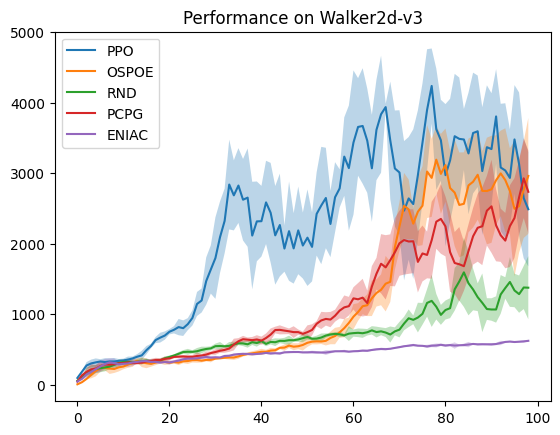

In [126]:
from numpy import convolve
names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC']
# names = ['OSPOE', 'PCPG', 'PPO']
table = {}
table_std = {}
for name in names:
    for run in range(5):
        filename = f'./Mujoco_eval_walker2d/{name}-seed{run}_mean.npy'
        table[name] = np.load(filename)
        filename_std = f'./Mujoco_eval_walker2d/{name}-seed{run}_std.npy'
        table_std[name] = np.load(filename_std) / 2
        
plt.figure()
plt.title('Performance on Walker2d-v3')
for k in table.keys():
    kernel = np.ones(3,) / 3
    y = table[k]
    y_ = convolve(y, kernel, mode='valid')
    std_ = table_std[k][:len(y_)]halfchee
    plt.plot(y_, label=k)
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.3)

plt.legend()

(202,)


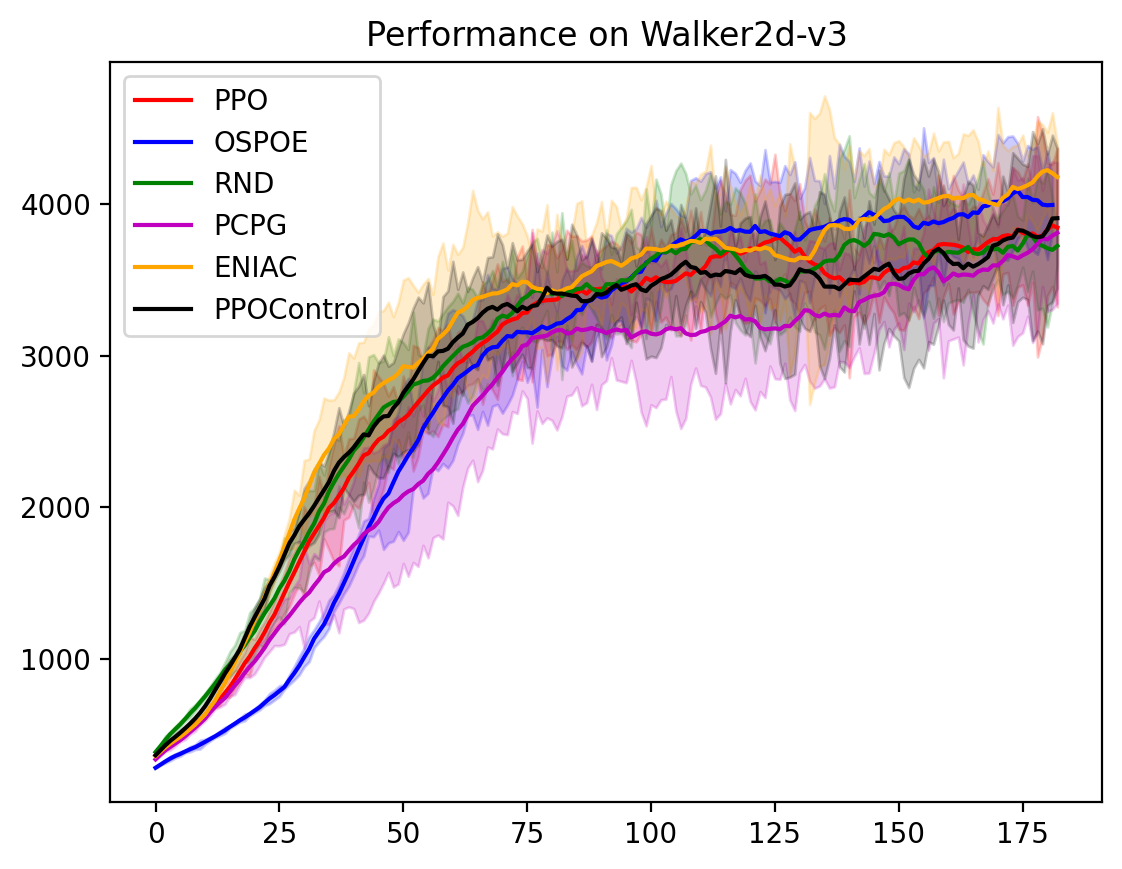

In [261]:
from numpy import convolve

names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC', 'PPOControl']
# names = ['PPO', 'OSPOE']
table = {}
table_std = {}
for name in names:
    for run in range(0, 5):
        filename = f'./Mujoco_eval_walker2d/{name}-seed{run}_mean.npy'
        
        if name not in table:
            table[name] = [np.load(filename)]
        else:
            table[name].append(np.load(filename))
    table[name] = np.array(table[name])                             
print(table['PPO'].mean(axis=0).shape)
plt.figure(dpi=200)
plt.title('Performance on Walker2d-v3')

colors = {'PPO' : 'red', 'OSPOE':'blue', 'RND':'green', 'PCPG':'m', 'ENIAC':'orange', 'PPOControl':'black'}
l = 20
for k in table.keys():
    kernel = np.ones(l,) / l
    y = table[k].mean(axis=0)
    y_ = convolve(y, kernel, mode='valid')
    
    std = table[k].std(axis=0)
    std_ = std[:len(y_)] / 2
    plt.plot(y_, label=k, color=colors[k])
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.2, color=colors[k])

plt.legend()

(120,)


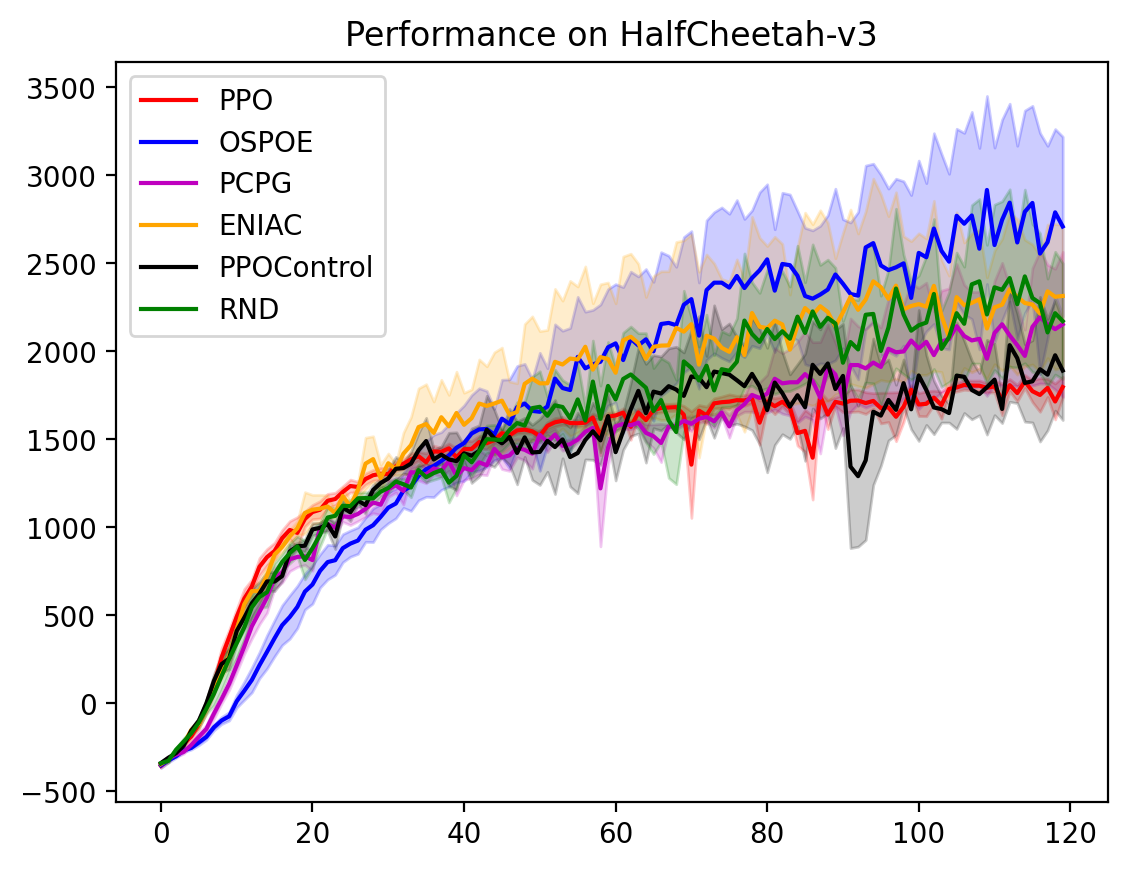

In [17]:
from numpy import convolve

names = ['PPO', 'OSPOE', 'PCPG', 'ENIAC', 'PPOControl', 'RND']
# names = ['PPO', 'OSPOE']
table = {}
table_std = {}
truncate = 120
for name in names:
    for run in range(0, 5):
        filename = f'./Mujoco_eval_halfcheetah/{name}-seed{run}_mean.npy'
        
        if name not in table:
            table[name] = [np.load(filename)[:truncate]]
        else:
            table[name].append(np.load(filename)[:truncate])
    table[name] = np.array(table[name])                             
print(table['PPO'].mean(axis=0).shape)
plt.figure(dpi=200)
plt.title('Performance on HalfCheetah-v3')

colors = {'PPO' : 'red', 'OSPOE':'blue', 'RND':'green', 'PCPG':'m', 'ENIAC':'orange', 'PPOControl':'black'}
l = 1
for k in table.keys():
    kernel = np.ones(l,) / l
    y = table[k].mean(axis=0)
    y_ = convolve(y, kernel, mode='valid')
    
    std = table[k].std(axis=0)
    std_ = std[:len(y_)] / 2
    plt.plot(y_, label=k, color=colors[k])
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.2, color=colors[k])

plt.legend()

(120,)


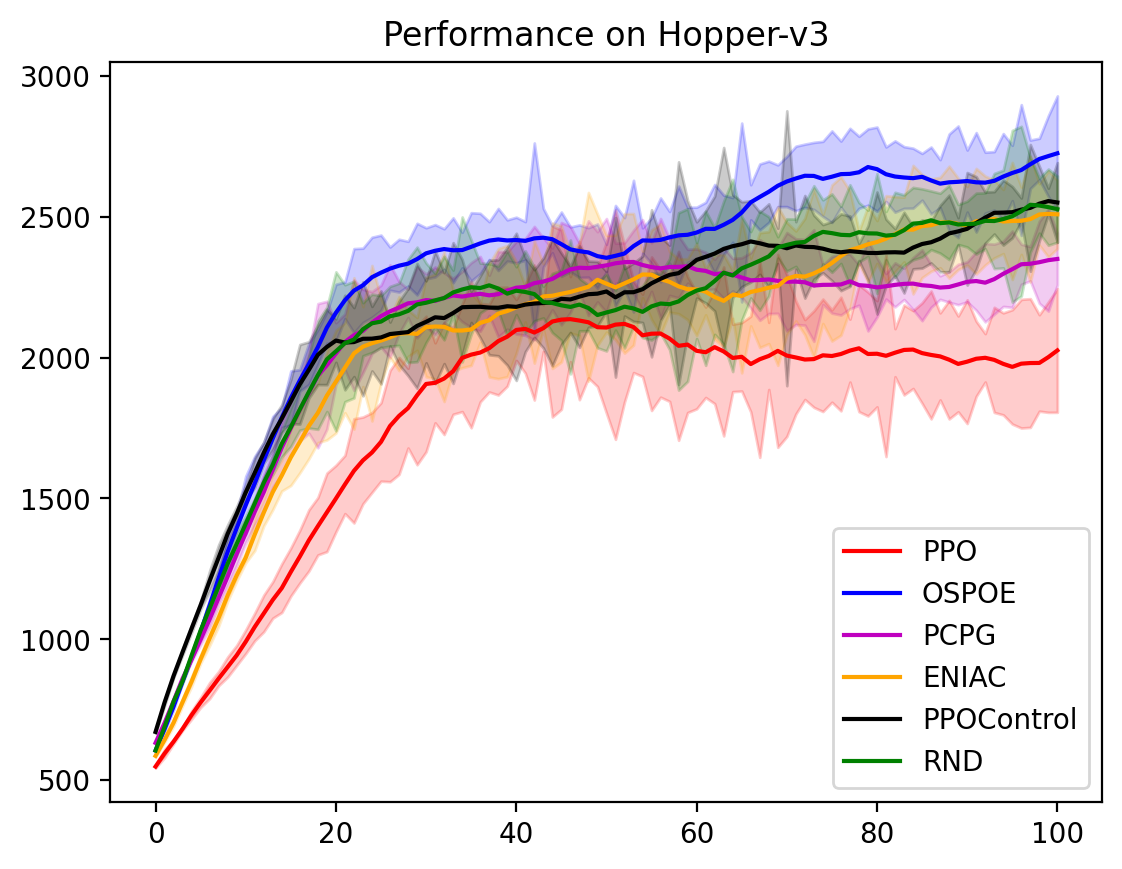

In [19]:
from numpy import convolve

names = ['PPO', 'OSPOE', 'PCPG', 'ENIAC', 'PPOControl', 'RND']
# names = ['PPO', 'OSPOE']
table = {}
table_std = {}
truncate = 120
for name in names:
    for run in range(0, 5):
        filename = f'./Mujoco_eval_hopper/{name}-seed{run}_mean.npy'
        
        if name not in table:
            table[name] = [np.load(filename)[:truncate]]
        else:
            table[name].append(np.load(filename)[:truncate])
    table[name] = np.array(table[name])                             
print(table['PPO'].mean(axis=0).shape)
plt.figure(dpi=200)
plt.title('Performance on Hopper-v3')

colors = {'PPO' : 'red', 'OSPOE':'blue', 'RND':'green', 'PCPG':'m', 'ENIAC':'orange', 'PPOControl':'black'}
l = 20
for k in table.keys():
    kernel = np.ones(l,) / l
    y = table[k].mean(axis=0)
    y_ = convolve(y, kernel, mode='valid')
    
    std = table[k].std(axis=0)
    std_ = std[:len(y_)] / 2
    plt.plot(y_, label=k, color=colors[k])
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.2, color=colors[k])

plt.legend()

(101,)


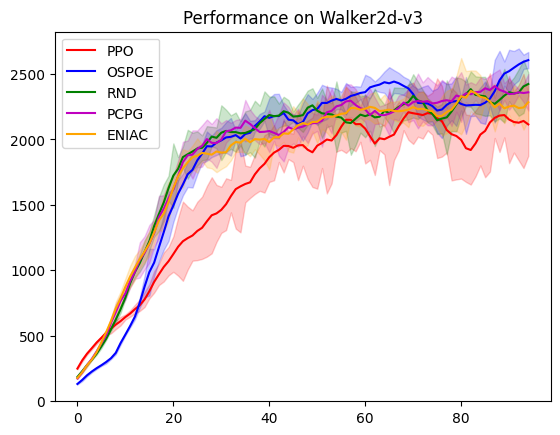

In [84]:
from numpy import convolve

names = ['PPO', 'OSPOE', 'RND', 'PCPG', 'ENIAC']
# names = ['PPO', 'OSPOE']
table = {}
table_std = {}
for name in names:
    for run in range(0, 5):
        filename = f'./Mujoco_eval_hopper_bk/{name}-seed{run}_mean.npy'
        
        if name not in table:
            table[name] = [np.load(filename)]
        else:
            table[name].append(np.load(filename))
    table[name] = np.array(table[name])                             
print(table['PPO'].mean(axis=0).shape)
plt.figure()
plt.title('Performance on Walker2d-v3')

colors = {'PPO' : 'red', 'OSPOE':'blue', 'RND':'green', 'PCPG':'m', 'ENIAC':'orange'}

for k in table.keys():
    kernel = np.ones(7,) / 7
    y = table[k].mean(axis=0)
    y_ = convolve(y, kernel, mode='valid')
    
    std = table[k].std(axis=0)
    std_ = std[:len(y_)] / 2
    plt.plot(y_, label=k, color=colors[k])
    plt.fill_between(range(len(std_)), y_ - std_, y_ + std_, alpha=0.2, color=colors[k])

plt.legend()

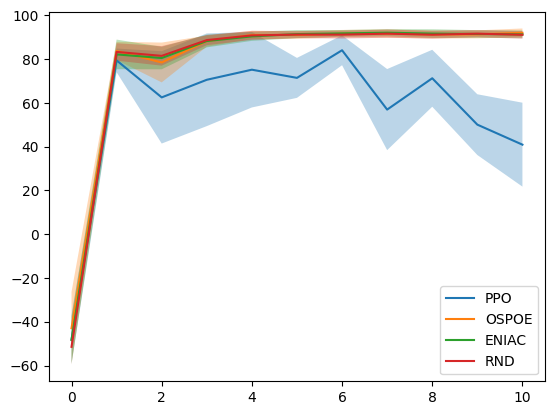

In [9]:
plt.figure()
for k in table.keys():
    plt.plot(table[k], label=k)
    plt.fill_between(range(len(table[k])), table[k] - table_std[k], table[k] + table_std[k], alpha=0.3)

plt.legend()